In [117]:
# Set the working directory to the desired path

import os
import matplotlib.pyplot as plt

path = 'C:/Users/MaxBo/OneDrive/Documents/Class MQE/Evidence Based Analysis/Wines'

os.chdir(path)

In [118]:
import pandas as pd

wines = pd.read_csv('Wines.csv')

In [119]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [120]:
#value counts on target variable

wines['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [121]:
#how many observations 

len(wines)

1143

In [122]:
#check for nulls

wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [123]:
#For this project, we are trying to predict high quality vs low quality wines.
#So, wines that are rated 7 or 8 are high and 3-6 are low

wines['quality_binary'] = wines.apply(lambda x: 1 if x['quality']>=7 else 0, axis=1)

In [124]:
#value counts our new target
wines['quality_binary'].value_counts()

0    984
1    159
Name: quality_binary, dtype: int64

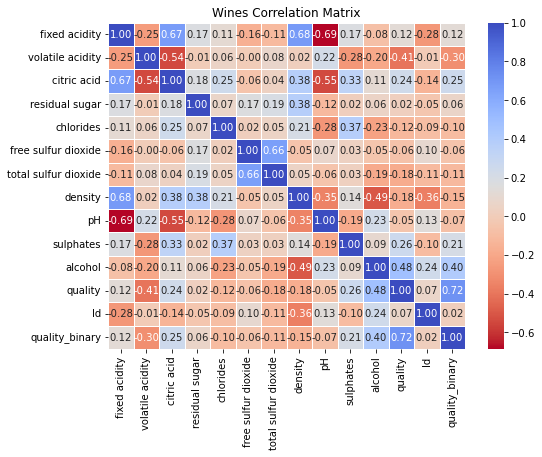

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

#view correlation matrix with heatmap

corr_matrix = wines.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", linewidths=0.5)

plt.title("Wines Correlation Matrix")
plt.show()

In [126]:
#Look at columns

wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id', 'quality_binary'],
      dtype='object')

In [127]:
#Split target and predictor variables

X = wines.drop(['quality_binary','quality','Id'],axis=1)
y = wines['quality_binary']

In [128]:
#We will run some machine learning models so we need to scale the variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [129]:
#Run a bunch of machine learning models to see which one is the most accurate


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




models = {
    "Logistic Regression": LogisticRegression(),
    "Gaussian NB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

#for loop for showing accuracy of each model
for name, model in models.items():
    if name in ["Random Forest", "XGBoost"]:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.9083
Gaussian NB: Accuracy = 0.8384
KNN: Accuracy = 0.8777
SVM: Accuracy = 0.8908
Random Forest: Accuracy = 0.9214
XGBoost: Accuracy = 0.9258


<Figure size 432x288 with 0 Axes>

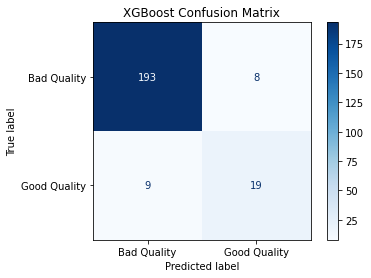

<Figure size 720x432 with 0 Axes>

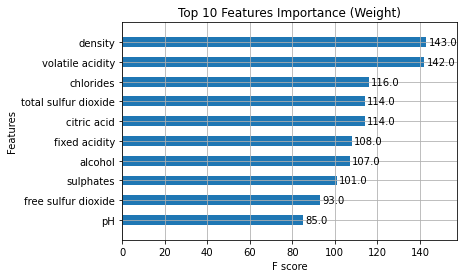

XGBoost Feature Importances (by weight):
density: 143.0
volatile acidity: 142.0
chlorides: 116.0
citric acid: 114.0
total sulfur dioxide: 114.0
fixed acidity: 108.0
alcohol: 107.0
sulphates: 101.0
free sulfur dioxide: 93.0
pH: 85.0
residual sugar: 80.0


In [134]:
# We will go with XG boost model

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad Quality", "Good Quality"])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("XGBoost Confusion Matrix")
#plt.savefig('XGBoost Confusion Matrix.jpg',bbox_inches='tight', dpi=300, format='jpg')
plt.show()

#feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5, 
                title="Top 10 Features Importance (Weight)", show_values=True)
#plt.savefig('XGBoost Feature Importance.jpg',bbox_inches='tight', dpi=300, format='jpg')

plt.show()


importances = xgb_model.get_booster().get_score(importance_type='weight')


sorted_importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))


feature_map = {f"f{i}": col for i, col in enumerate(X_train.columns)}


named_importances = {feature_map.get(k, k): v for k, v in sorted_importances.items()}


print("XGBoost Feature Importances (by weight):")
for feature, importance in named_importances.items():
    print(f"{feature}: {importance}")



In [135]:
from sklearn.metrics import classification_report

#classification report
print(classification_report(y_test, y_pred, target_names=["Bad Quality", "Good Quality"]))


              precision    recall  f1-score   support

 Bad Quality       0.96      0.96      0.96       201
Good Quality       0.70      0.68      0.69        28

    accuracy                           0.93       229
   macro avg       0.83      0.82      0.82       229
weighted avg       0.92      0.93      0.93       229



In [136]:
#Low recall due to unbalanced data and the XG boost model is biased towards majority class (bad quality wines)

#We shall fix this with some techniques

<Figure size 432x288 with 0 Axes>

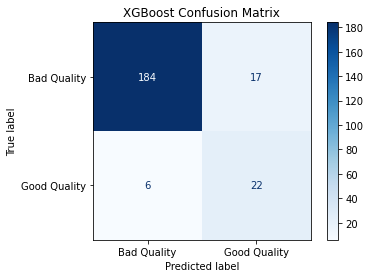

              precision    recall  f1-score   support

 Bad Quality       0.97      0.92      0.94       201
Good Quality       0.56      0.79      0.66        28

    accuracy                           0.90       229
   macro avg       0.77      0.85      0.80       229
weighted avg       0.92      0.90      0.91       229

XGBoost Feature Importances (by weight):
volatile acidity: 162.0
alcohol: 150.0
citric acid: 139.0
chlorides: 136.0
total sulfur dioxide: 135.0
sulphates: 126.0
density: 125.0
fixed acidity: 118.0
pH: 117.0
residual sugar: 116.0
free sulfur dioxide: 109.0


In [137]:
#First adjust class weights.

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad Quality", "Good Quality"])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("XGBoost Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Bad Quality", "Good Quality"]))


importances = xgb_model.get_booster().get_score(importance_type='weight')

sorted_importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))


feature_map = {f"f{i}": col for i, col in enumerate(X_train.columns)}

named_importances = {feature_map.get(k, k): v for k, v in sorted_importances.items()}


print("XGBoost Feature Importances (by weight):")
for feature, importance in named_importances.items():
    print(f"{feature}: {importance}")


C:\Users\MaxBo\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

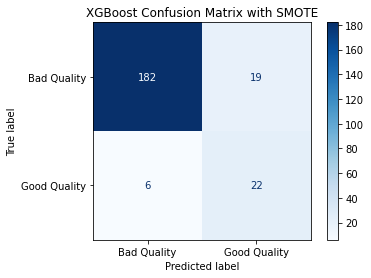

              precision    recall  f1-score   support

 Bad Quality       0.97      0.91      0.94       201
Good Quality       0.54      0.79      0.64        28

    accuracy                           0.89       229
   macro avg       0.75      0.85      0.79       229
weighted avg       0.92      0.89      0.90       229



In [138]:
#Another technique is SMOTE

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)


y_pred = xgb_model.predict(X_test_scaled)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad Quality", "Good Quality"])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("XGBoost Confusion Matrix with SMOTE")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Bad Quality", "Good Quality"]))


In [139]:
#SMOTE actually just makes precision of good quality worse. (Predicted positives of actual positives)
#model to stick with is the one simply with weighted classes

<Figure size 432x288 with 0 Axes>

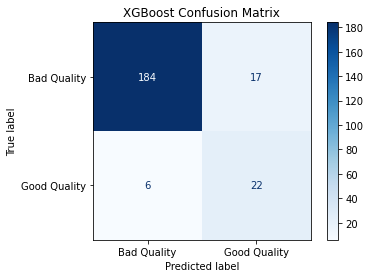

              precision    recall  f1-score   support

 Bad Quality       0.97      0.92      0.94       201
Good Quality       0.56      0.79      0.66        28

    accuracy                           0.90       229
   macro avg       0.77      0.85      0.80       229
weighted avg       0.92      0.90      0.91       229



<Figure size 720x432 with 0 Axes>

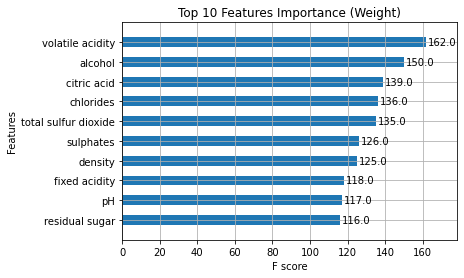

XGBoost Feature Importances (by weight):
volatile acidity: 162.0
alcohol: 150.0
citric acid: 139.0
chlorides: 136.0
total sulfur dioxide: 135.0
sulphates: 126.0
density: 125.0
fixed acidity: 118.0
pH: 117.0
residual sugar: 116.0
free sulfur dioxide: 109.0


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


X_train = pd.DataFrame(X_train, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                                         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                                         'pH', 'sulphates', 'alcohol'])


xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
)
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad Quality", "Good Quality"])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("XGBoost Confusion Matrix")
plt.show()


print(classification_report(y_test, y_pred, target_names=["Bad Quality", "Good Quality"]))


plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5, 
                title="Top 10 Features Importance (Weight)", show_values=True)
plt.show()



importances = xgb_model.get_booster().get_score(importance_type='weight')


sorted_importances = dict(sorted(importances.items(), key=lambda item: item[1], reverse=True))

feature_map = {f"f{i}": col for i, col in enumerate(X_train.columns)}


named_importances = {feature_map.get(k, k): v for k, v in sorted_importances.items()}


print("XGBoost Feature Importances (by weight):")
for feature, importance in named_importances.items():
    print(f"{feature}: {importance}")


In [141]:
#Through XGBoosting, we can say that Volatile acidity and alcohol are the two most important features in predicting wine quality.

<Figure size 432x288 with 0 Axes>

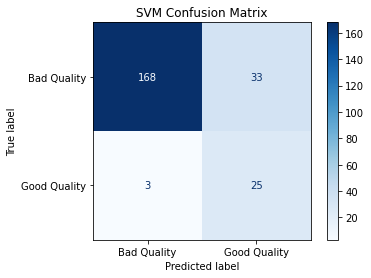

SVM Classification Report:

              precision    recall  f1-score   support

 Bad Quality       0.98      0.84      0.90       201
Good Quality       0.43      0.89      0.58        28

    accuracy                           0.84       229
   macro avg       0.71      0.86      0.74       229
weighted avg       0.92      0.84      0.86       229



In [142]:
#Support vector machine

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#Build a pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', class_weight='balanced'))  # RBF is the default kernel
])


svm_pipeline.fit(X_train, y_train)

y_pred_svm = svm_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad Quality", "Good Quality"])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("SVM Confusion Matrix")
plt.show()


print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm, target_names=["Bad Quality", "Good Quality"]))


Best Parameters: {'svm__C': 10, 'svm__gamma': 0.1}


<Figure size 432x288 with 0 Axes>

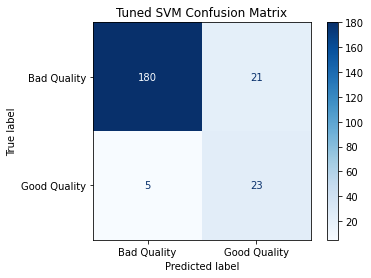

Tuned SVM Classification Report:

              precision    recall  f1-score   support

 Bad Quality       0.97      0.90      0.93       201
Good Quality       0.52      0.82      0.64        28

    accuracy                           0.89       229
   macro avg       0.75      0.86      0.79       229
weighted avg       0.92      0.89      0.90       229



In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', class_weight='balanced'))
])

#Hyperparameter grid
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}

#Do some cross validation
grid = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)


best_svm = grid.best_estimator_
print(f"Best Parameters: {grid.best_params_}")


y_pred_svm_tuned = best_svm.predict(X_test)


cm = confusion_matrix(y_test, y_pred_svm_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad Quality", "Good Quality"])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Tuned SVM Confusion Matrix")
plt.show()


print("Tuned SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm_tuned, target_names=["Bad Quality", "Good Quality"]))


C:\Users\MaxBo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MaxBo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Params with SVM: {'svm__C': 10, 'svm__gamma': 1}


<Figure size 432x288 with 0 Axes>

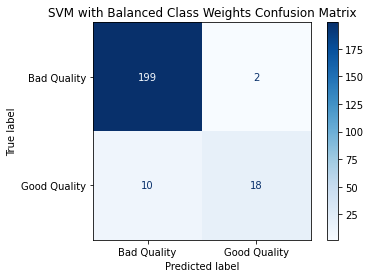

SVM with Balanced Class Weights Classification Report:

              precision    recall  f1-score   support

 Bad Quality       0.95      0.99      0.97       201
Good Quality       0.90      0.64      0.75        28

    accuracy                           0.95       229
   macro avg       0.93      0.82      0.86       229
weighted avg       0.95      0.95      0.94       229



In [144]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', class_weight='balanced'))
])


param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}

grid = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='precision')
grid.fit(X_train, y_train)


best_svm = grid.best_estimator_
print(f"Best Params with SVM: {grid.best_params_}")


y_pred_svm = best_svm.predict(X_test)


cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad Quality", "Good Quality"])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("SVM with Balanced Class Weights Confusion Matrix")
plt.show()


print("SVM with Balanced Class Weights Classification Report:\n")
print(classification_report(y_test, y_pred_svm, target_names=["Bad Quality", "Good Quality"]))


C:\Users\MaxBo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MaxBo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Params with SVM: {'svm__C': 10, 'svm__gamma': 1}


<Figure size 432x288 with 0 Axes>

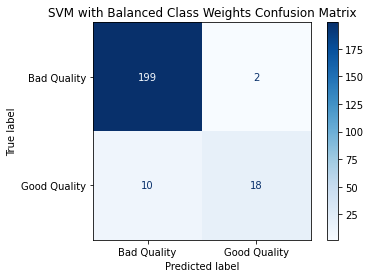

SVM with Balanced Class Weights Classification Report:

              precision    recall  f1-score   support

 Bad Quality       0.95      0.99      0.97       201
Good Quality       0.90      0.64      0.75        28

    accuracy                           0.95       229
   macro avg       0.93      0.82      0.86       229
weighted avg       0.95      0.95      0.94       229



In [153]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', class_weight='balanced'))
])


param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}


grid = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='precision')
grid.fit(X_train, y_train)


best_svm = grid.best_estimator_
print(f"Best Params with SVM: {grid.best_params_}")


y_pred_svm = best_svm.predict(X_test)


cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad Quality", "Good Quality"])

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("SVM with Balanced Class Weights Confusion Matrix")
#plt.savefig('SVM Confusion Matrix.jpg',bbox_inches='tight', dpi=300, format='jpg')
plt.show()


print("SVM with Balanced Class Weights Classification Report:\n")
print(classification_report(y_test, y_pred_svm, target_names=["Bad Quality", "Good Quality"]))



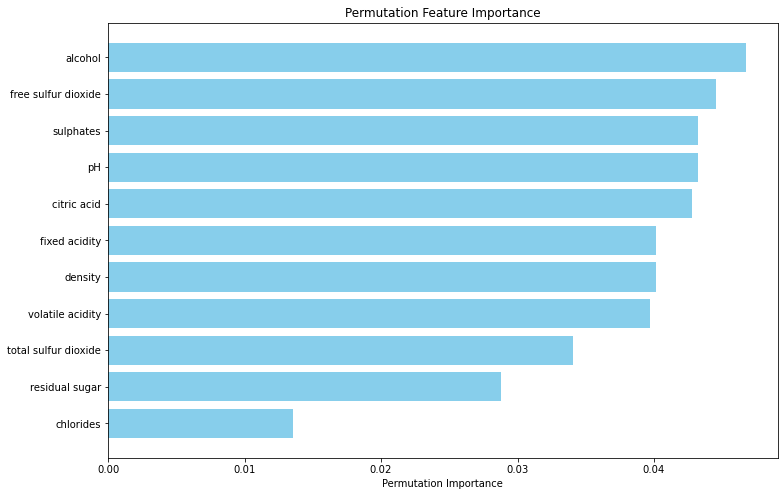

In [152]:
import pandas as pd


feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                 'pH', 'sulphates', 'alcohol']


X_test_df = pd.DataFrame(X_test, columns=feature_names)


perm_importance = permutation_importance(best_svm, X_test_df, y_test, n_repeats=10, random_state=42, n_jobs=-1)


importance_df = pd.DataFrame({
    'Feature': X_test_df.columns,
    'Importance': perm_importance.importances_mean
})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')

#plt.savefig('SVM Feature Importance.jpg',bbox='tight',dpi=300, format='jpg')
plt.show()


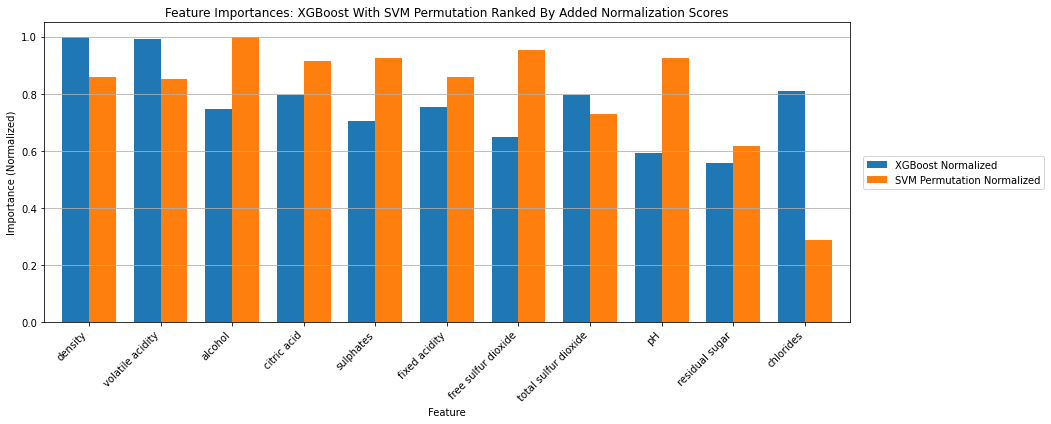

In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# XGBoost feature importance (by weight)
# xgb_importance = {
#     'volatile acidity': 162.0,
#     'alcohol': 150.0,
#     'citric acid': 139.0,
#     'chlorides': 136.0,
#     'total sulfur dioxide': 135.0,
#     'sulphates': 126.0,
#     'density': 125.0,
#     'fixed acidity': 118.0,
#     'pH': 117.0,
#     'residual sugar': 116.0,
#     'free sulfur dioxide': 109.0
# }

#XGBoost
xgb_importance = {
'density': 143.0,
'volatile acidity': 142.0,
'chlorides': 116.0,
'citric acid': 114.0,
'total sulfur dioxide': 114.0,
'fixed acidity': 108.0,
'alcohol': 107.0,
'sulphates': 101.0,
'free sulfur dioxide': 93.0,
'pH': 85.0,
'residual sugar': 80.0
}
#SVM 
svm_importance = {
    'chlorides': 0.013537,
    'residual sugar': 0.028821,
    'total sulfur dioxide': 0.034061,
    'volatile acidity': 0.039738,
    'density': 0.040175,
    'fixed acidity': 0.040175,
    'citric acid': 0.042795,
    'pH': 0.043231,
    'sulphates': 0.043231,
    'free sulfur dioxide': 0.044541,
    'alcohol': 0.046725
}


xgb_df = pd.DataFrame(list(xgb_importance.items()), columns=["Feature", "XGBoost Importance"]).set_index("Feature")
svm_df = pd.DataFrame(list(svm_importance.items()), columns=["Feature", "SVM Importance"]).set_index("Feature")


combined_df = xgb_df.join(svm_df)


combined_df["XGBoost Importance (Normalized)"] = combined_df["XGBoost Importance"] / combined_df["XGBoost Importance"].max()
combined_df["SVM (Normalized)"] = combined_df["SVM Importance"] / combined_df["SVM Importance"].max()

combined_df['ranked'] = combined_df['XGBoost Importance (Normalized)']+combined_df['SVM (Normalized)']


combined_df_sorted = combined_df.sort_values("ranked", ascending=False)
ax = combined_df_sorted[["XGBoost Importance (Normalized)", "SVM (Normalized)"]].plot(kind='bar', figsize=(12, 6), width=0.75)
plt.title("Feature Importances: XGBoost With SVM Permutation Ranked By Added Normalization Scores")
plt.ylabel("Importance (Normalized)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(["XGBoost Normalized", "SVM Permutation Normalized"], bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.grid(axis='y')

#plt.savefig('Feature Importance Combined Wines.jpg',bbox_inches='tight', dpi=300, format='jpg')

plt.show()

